<a href="https://colab.research.google.com/github/namanjain0531/FlipRobotech/blob/master/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv("/content/drive/My Drive/chatbot/cardio.csv")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


#Data Analysis

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [6]:
data.shape

(69301, 13)

In [7]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.skew()

id             -0.001317
age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

#VISUALIZATION

In [11]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

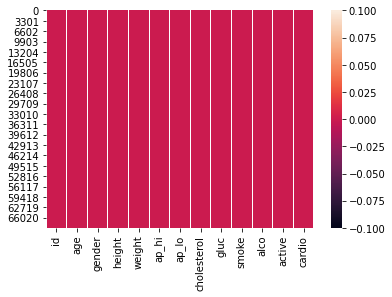

In [12]:
sns.heatmap(data.isnull())

In [13]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003587,0.003773,-0.003735,-0.001549,0.003268,-0.002757,0.006400,0.002543,-0.003294,0.000384,0.002700,0.004269
age,0.003587,1.000000,-0.023150,-0.081304,0.054409,0.020663,0.017717,0.154343,0.099095,-0.047680,-0.029435,-0.009926,0.238095
gender,0.003773,-0.023150,1.000000,0.499373,0.155649,0.005980,0.015396,-0.036335,-0.021154,0.337608,0.171015,0.006241,0.008592
height,-0.003735,-0.081304,0.499373,1.000000,0.290333,0.005492,0.006215,-0.050632,-0.018929,0.187899,0.094164,-0.005974,-0.011015
weight,-0.001549,0.054409,0.155649,0.290333,1.000000,0.030665,0.043652,0.141901,0.107255,0.068304,0.067259,-0.016514,0.182094
ap_hi,0.003268,0.020663,0.005980,0.005492,0.030665,1.000000,0.015919,0.023573,0.011821,-0.000933,0.001385,0.000032,0.054211
ap_lo,-0.002757,0.017717,0.015396,0.006215,0.043652,0.015919,1.000000,0.024023,0.010895,0.004948,0.010764,0.004962,0.065290
cholesterol,0.006400,0.154343,-0.036335,-0.050632,0.141901,0.023573,0.024023,1.000000,0.451741,0.010237,0.036015,0.009708,0.220752
gluc,0.002543,0.099095,-0.021154,-0.018929,0.107255,0.011821,0.010895,0.451741,1.000000,-0.004608,0.011442,-0.007301,0.089062
smoke,-0.003294,-0.047680,0.337608,0.187899,0.068304,-0.000933,0.004948,0.010237,-0.004608,1.000000,0.339709,0.025794,-0.015225


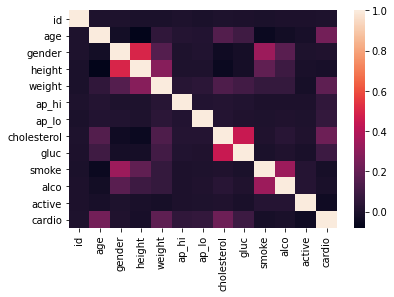

In [14]:
sns.heatmap(data.corr())

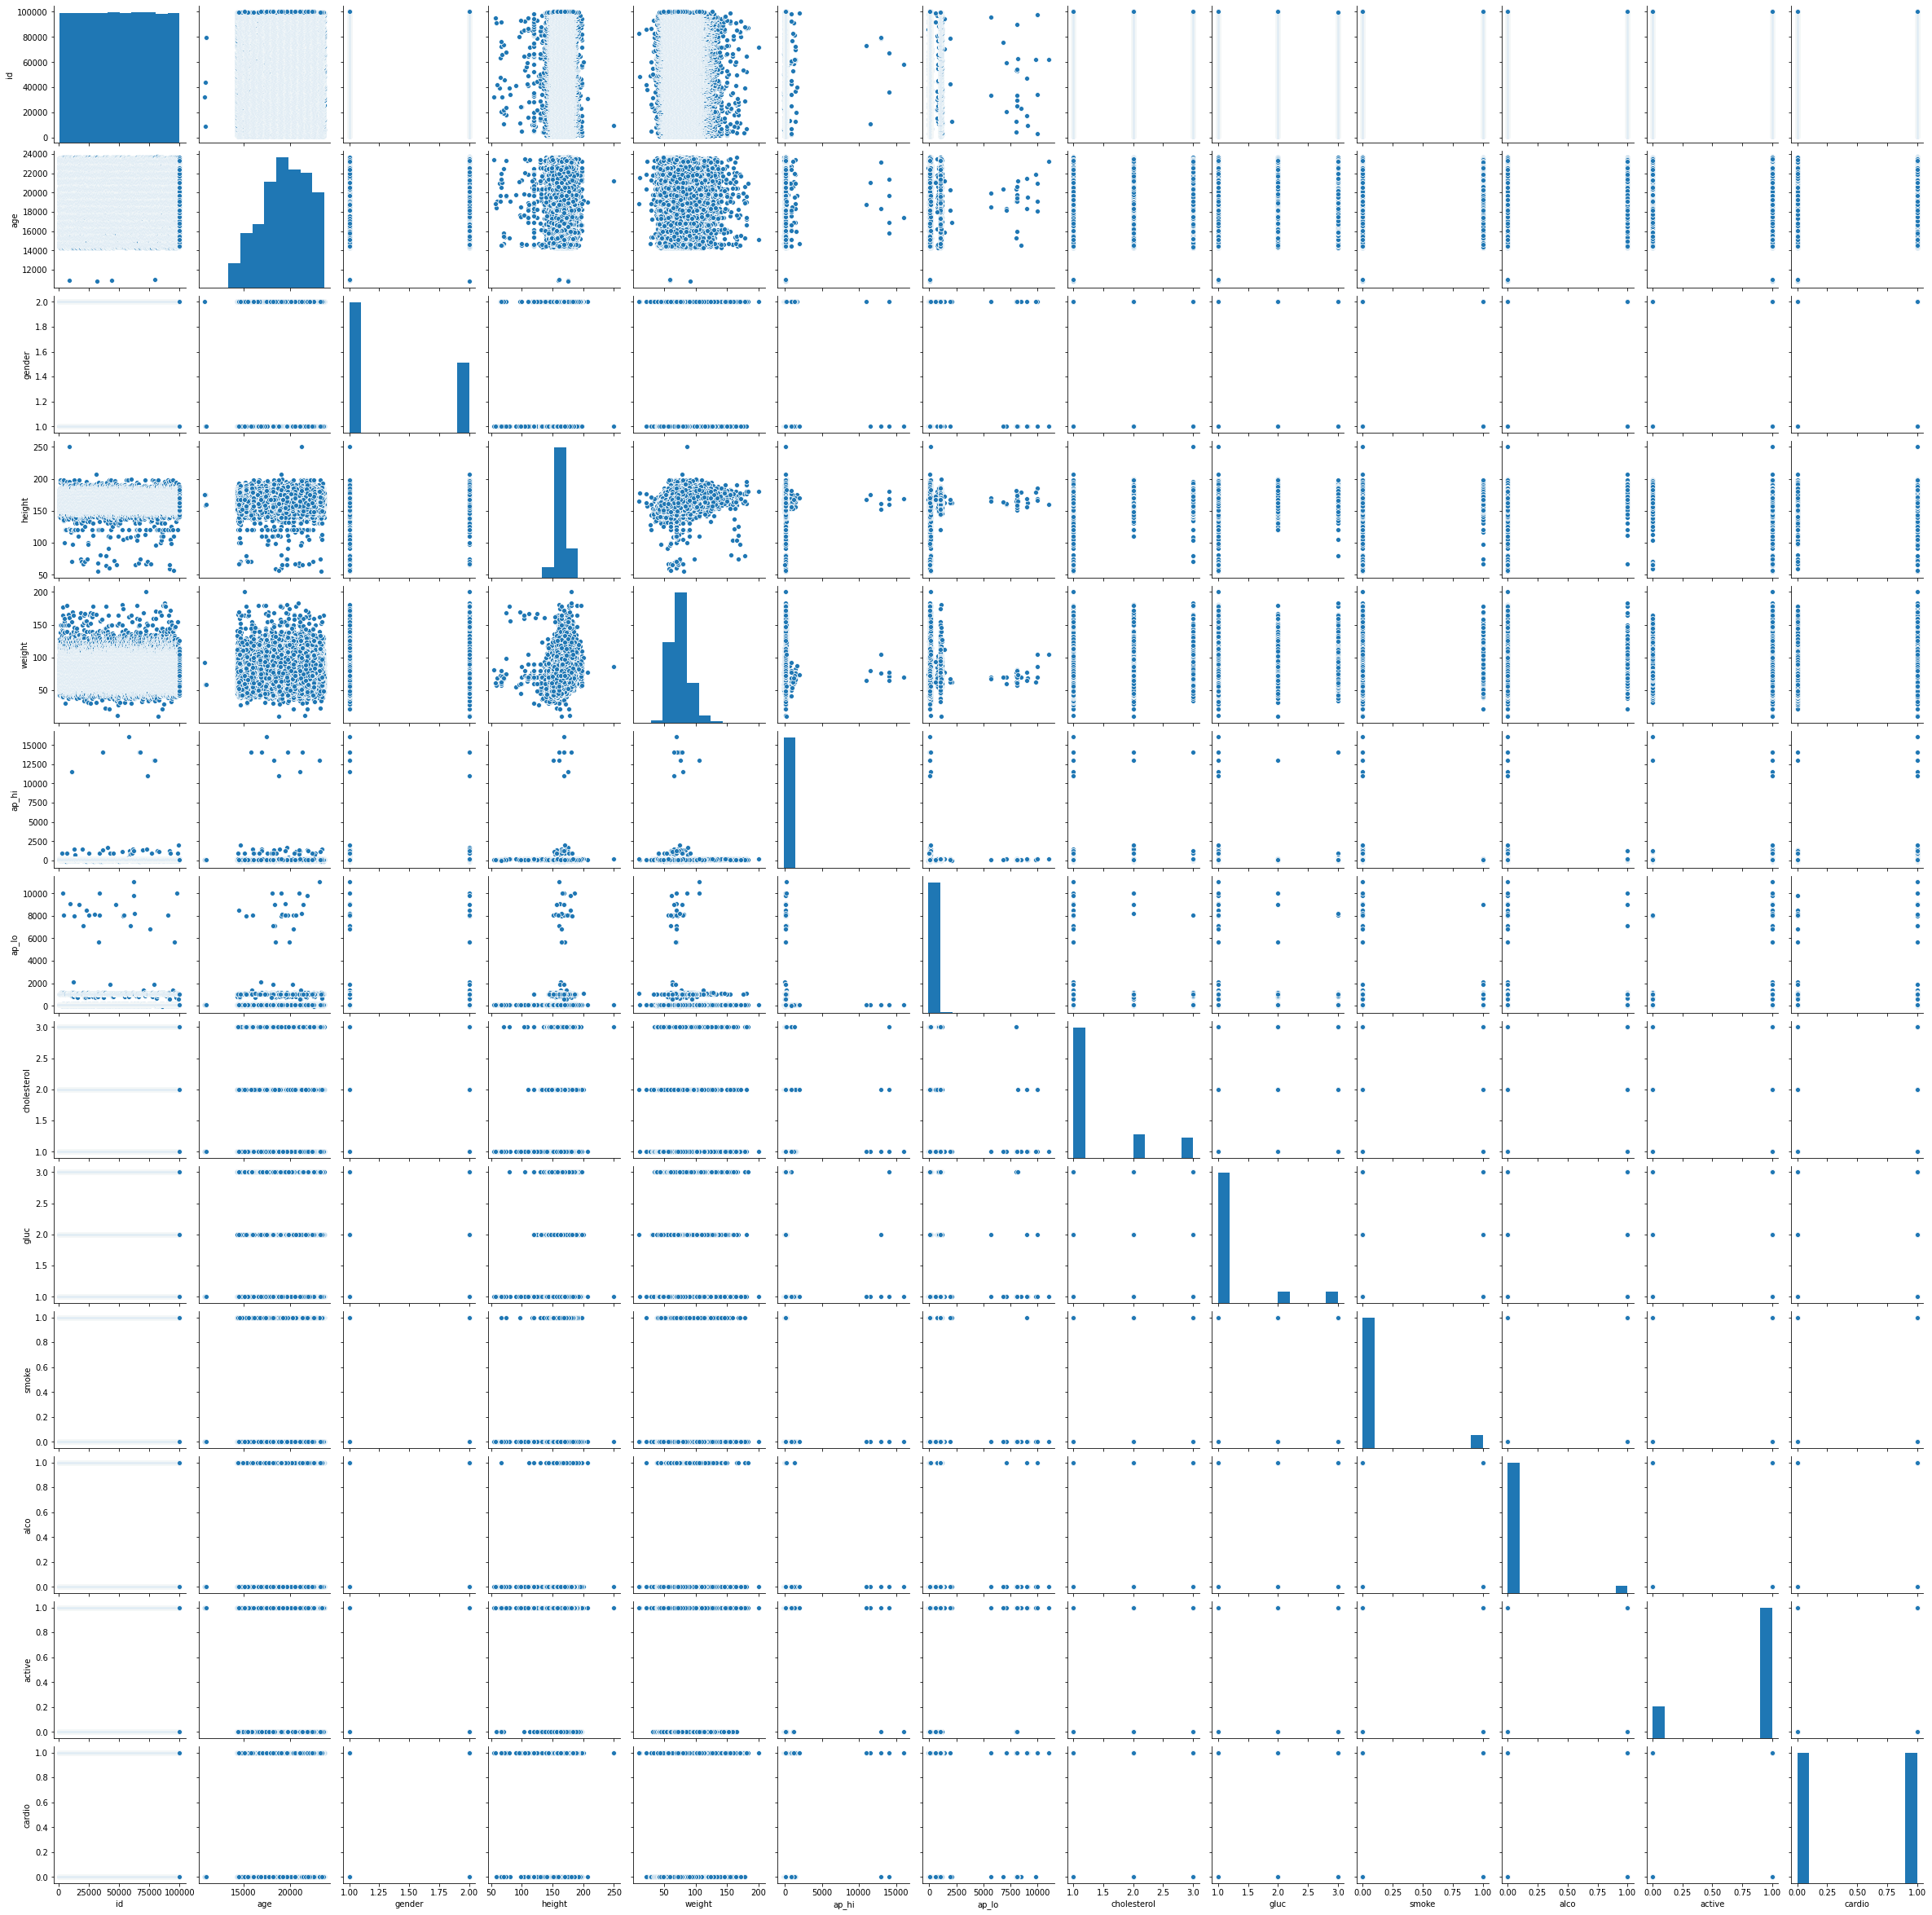

In [15]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdba8d5b710>,
      dtype=object)

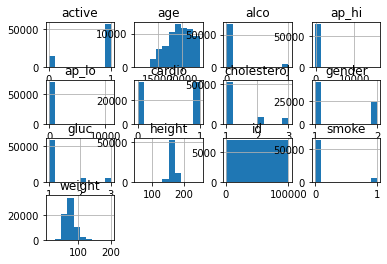

In [16]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdba7d6b6a0>,
      dtype=object)

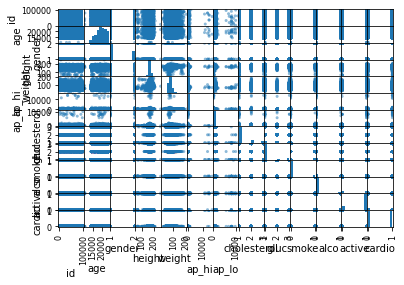

In [17]:

from pandas.plotting import scatter_matrix
scatter_matrix(data)

In [18]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

#Checking Outliers

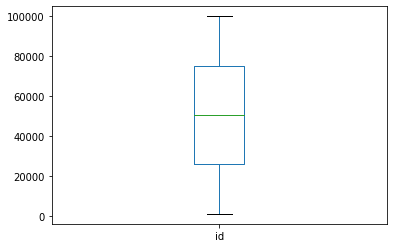

In [19]:
data['id'].plot.box()

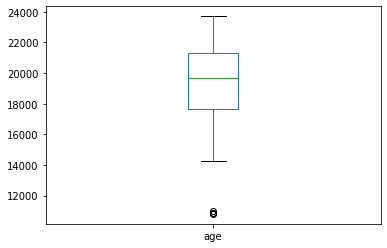

In [20]:
data['age'].plot.box()

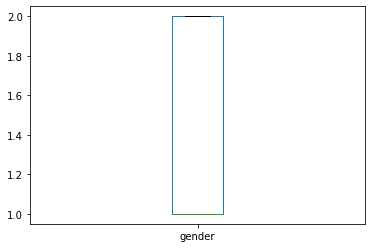

In [21]:
data['gender'].plot.box()

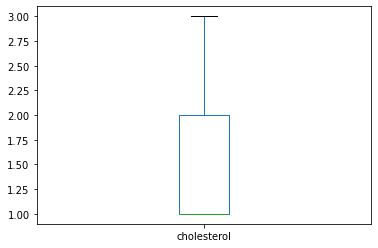

In [22]:
data['cholesterol'].plot.box()

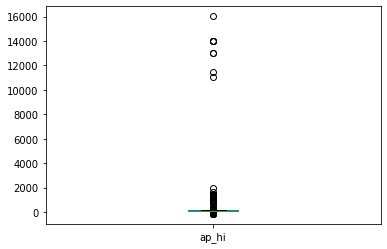

In [23]:
data['ap_hi'].plot.box()

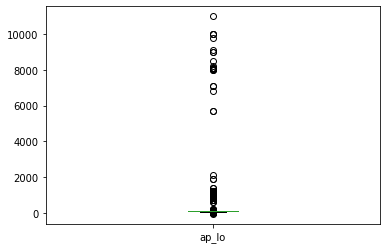

In [24]:
data['ap_lo'].plot.box()

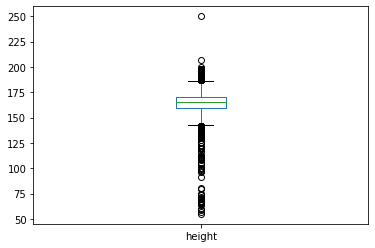

In [25]:
data['height'].plot.box()

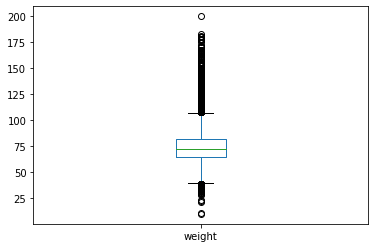

In [26]:
data['weight'].plot.box()

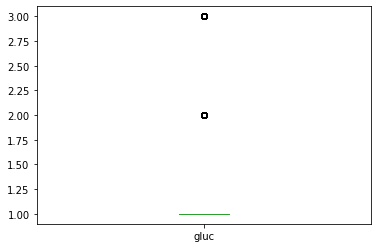

In [27]:
data['gluc'].plot.box()

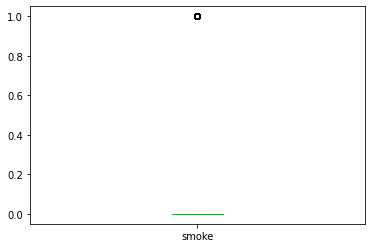

In [28]:
data['smoke'].plot.box()

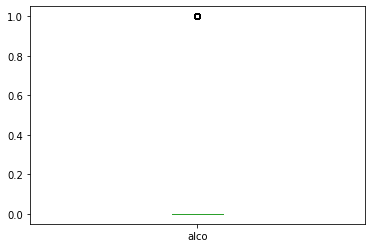

In [29]:
data['alco'].plot.box()

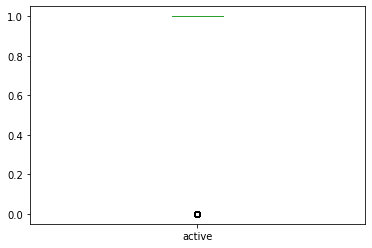

In [30]:
data['active'].plot.box()

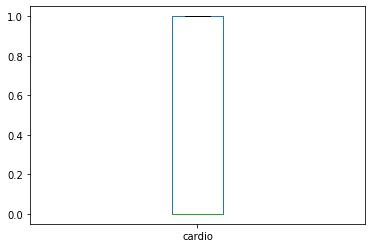

In [31]:
data['cardio'].plot.box()

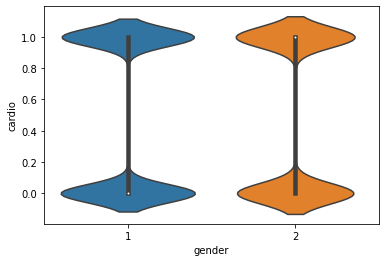

In [32]:
#Bivariate Plots
sns.violinplot(x='gender',y='cardio',data=data)
plt.show()

#DATA CLEANING,HANDLE SKEWNESS,MISSING VALUES

In [33]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [34]:
data['age']=data['age'].apply(lambda x : x//365)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0


In [35]:
data1=data.drop(['id'],axis=1)

In [36]:
#Removing ouliers
from scipy.stats import zscore
z=np.abs(zscore(data1))
z

array([[1.20581624, 0.73302344, 1.14099939, ..., 0.23864069, 0.49376463,
        0.99917784],
       [1.89764614, 0.73302344, 0.16601717, ..., 0.23864069, 0.49376463,
        1.00082284],
       [1.05803232, 0.73302344, 0.07772839, ..., 0.23864069, 0.49376463,
        0.99917784],
       ...,
       [0.12423906, 1.36421285, 2.27143838, ..., 4.19040018, 2.02525646,
        1.00082284],
       [1.20581624, 0.73302344, 0.16601717, ..., 0.23864069, 2.02525646,
        1.00082284],
       [0.46689663, 0.73302344, 0.68709227, ..., 0.23864069, 0.49376463,
        0.99917784]])

In [37]:
threshold=3
print(np.where(z>3))


(array([    3,     3,    13, ..., 69296, 69297, 69298]), array([8, 9, 7, ..., 8, 3, 9]))


In [38]:
data_new=data1[(z<3).all(axis=1)]
data_new.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,1,155,69.0,130,80,2,2,0,0,1,0
1,40,1,163,71.0,110,70,1,1,0,0,1,1
2,60,1,165,70.0,120,80,1,1,0,0,1,0
4,64,1,155,62.0,120,80,1,1,0,0,1,0
5,57,1,164,61.0,100,70,1,1,0,0,1,0


#Previous Skewness

In [39]:
data1.skew()

age            -0.306050
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

#After Removing Outliers

In [40]:
data_new.skew()

age           -0.288225
gender         0.902729
height         0.098899
weight         0.574304
ap_hi         -0.252020
ap_lo          4.735143
cholesterol    2.018967
gluc           3.202861
smoke          0.000000
alco           0.000000
active        -1.498342
cardio         0.061184
dtype: float64

In [41]:
data_new.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

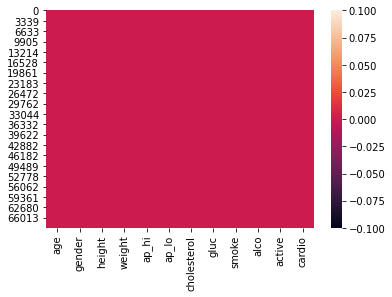

In [42]:
sns.heatmap(data_new.isnull())

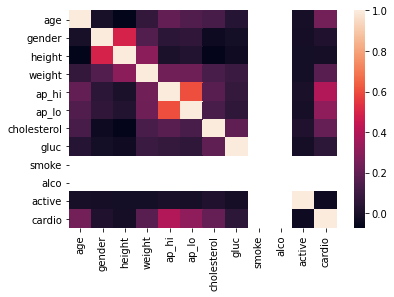

In [43]:
sns.heatmap(data_new.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdba295ad68>,
      dtype=object)

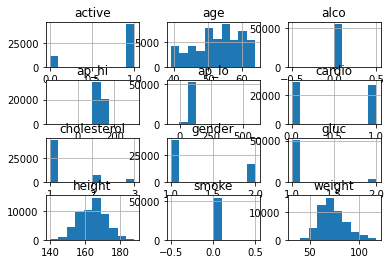

In [44]:
data_new.hist()

#SPLITTING DATA INTO X AND Y FOR TRAINING AND TEST


In [45]:
x=data_new.drop('cardio',axis=1)
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,61,1,155,69.0,130,80,2,2,0,0,1
1,40,1,163,71.0,110,70,1,1,0,0,1
2,60,1,165,70.0,120,80,1,1,0,0,1
4,64,1,155,62.0,120,80,1,1,0,0,1
5,57,1,164,61.0,100,70,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69293,51,1,161,56.0,170,90,1,1,0,0,1
69294,53,1,172,70.0,130,90,1,1,0,0,1
69295,57,1,165,80.0,150,80,1,1,0,0,1
69299,61,1,163,72.0,135,80,1,2,0,0,0


In [50]:
#Using MinMaxScaler to shrinks the range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x.astype(float))
x

array([[0.88      , 0.        , 0.3125    , ..., 0.        , 0.        ,
        1.        ],
       [0.04      , 0.        , 0.47916667, ..., 0.        , 0.        ,
        1.        ],
       [0.84      , 0.        , 0.52083333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.72      , 0.        , 0.52083333, ..., 0.        , 0.        ,
        1.        ],
       [0.88      , 0.        , 0.47916667, ..., 0.        , 0.        ,
        0.        ],
       [0.68      , 0.        , 0.625     , ..., 0.        , 0.        ,
        1.        ]])

In [55]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.88,0.0,0.312500,0.435294,0.610022,0.223214,0.5,1.0,0.0,0.0,1.0
1,0.04,0.0,0.479167,0.458824,0.566449,0.208333,0.0,0.0,0.0,0.0,1.0
2,0.84,0.0,0.520833,0.447059,0.588235,0.223214,0.0,0.0,0.0,0.0,1.0
3,1.00,0.0,0.312500,0.352941,0.588235,0.223214,0.0,0.0,0.0,0.0,1.0
4,0.72,0.0,0.500000,0.341176,0.544662,0.208333,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
55135,0.48,0.0,0.437500,0.282353,0.697168,0.238095,0.0,0.0,0.0,0.0,1.0
55136,0.56,0.0,0.666667,0.447059,0.610022,0.238095,0.0,0.0,0.0,0.0,1.0
55137,0.72,0.0,0.520833,0.564706,0.653595,0.223214,0.0,0.0,0.0,0.0,1.0
55138,0.88,0.0,0.479167,0.470588,0.620915,0.223214,0.0,1.0,0.0,0.0,0.0


In [56]:
y=data_new['cardio']
y

0        0
1        1
2        0
4        0
5        0
        ..
69293    1
69294    1
69295    1
69299    1
69300    0
Name: cardio, Length: 55140, dtype: int64

In [57]:
#finding the best score at best random state value
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38598, 11)
(16542, 11)
(38598,)
(16542,)


#Apply Model and Algorithms

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [63]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='accuracy'
# Spot Check Algorithms
models = []
models.append(('lr', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('gbc', GradientBoostingClassifier()))
results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lr: 0.724986 (0.006256)
KNN: 0.668947 (0.004763)
dtc: 0.636510 (0.005154)
rfc: 0.702523 (0.006787)
gbc: 0.734313 (0.005429)


#Using GridSearchCV for improving model performance

In [64]:
#pipeline with preprocessing and model
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
pipeline=make_pipeline(preprocessing.MinMaxScaler(),GradientBoostingClassifier(n_estimators=100))

In [65]:
#Appling Hyperparameters
pipeline.get_params()

{'gradientboostingclassifier': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 'gradientboostingclassifier__ccp_alpha': 0.0,
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboos

In [66]:
hyperparameters = { 'gradientboostingclassifier__criterion' : ['friedman_mse'],
                   'gradientboostingclassifier__max_depth': [1,3]
                   }

In [67]:
test=GridSearchCV(pipeline,hyperparameters,cv=10)
test.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(ccp_alpha=0.0,
                                                                   criterion='friedman_mse',
                                                                   init=None,
                                                                   learning_rate=0.1,
                                                                   loss='deviance',
                                                                   max_depth=3,
                                                                   max_features=None,
                                                              

In [68]:
print(test.best_params_)

{'gradientboostingclassifier__criterion': 'friedman_mse', 'gradientboostingclassifier__max_depth': 3}


In [69]:
print(test.refit)

True


In [73]:

#pedicting the data
y_pred=test.predict(x_test)
print(accuracy_score(y_test,y_pred))


0.7308064321121992


In [74]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[6710, 1811],
       [2642, 5379]])

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      8521
           1       0.75      0.67      0.71      8021

    accuracy                           0.73     16542
   macro avg       0.73      0.73      0.73     16542
weighted avg       0.73      0.73      0.73     16542



In [76]:

data1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data1

,Actual,Predicted
26415,0,0
41637,0,1
32423,1,0
57327,1,1
48779,1,1
...,...,...
41304,1,0
38439,1,1
41177,1,0
32606,1,1


In [78]:

#Save the model
from sklearn.externals import joblib
joblib.dump(gbc,"cardiopr.pkl")

['cardiopr.pkl']